# Statistical Learning Coursework 2021 
# <font color="red">New Extended DEADLINE 21th May 2021 17:00</font>

Files with data that have to be downloaded:

- bank_notes.csv
- avocado_data.csv



### INSTRUCTIONS
- Answer both Problems 1 and 2, in problem 2 you may pick between 2.3 or 2.4. Only one of these is required.  
- This is an INDIVIDUAL coursework
- This must be all your own work.

- Test your functions to ensure that they perform the required calculations correctly.

- Functions that are unused/untested won’t gain full marks.

- Functions that return syntax errors or other errors, won't get more than 2 marks. 

- Give variables and functions meaningful names.

- Make your code clear.

- Bracket expressions only where needed; try not use extra redundant brackets.

- You may choose to split large tasks or functions into
smaller pieces, each of which performs a well-defined part of the
calculation.  (However, don't overdo this!  Only introduce smaller
functions if they perform a well-defined task and make the program
clearer.)

- Where appropriate, you should always **use** functions
that you have already defined earlier in your answers, to help with
later questions, rather than duplicating code.

- You can use functions that you made in the lab sessions.

- Your answers will be check against Python plagiarism library (https://pypi.org/project/plagiarism/) ensure that you do the work yourself! 

- If your code is non-standard using techniques beyond the course, you may be asked to explain all the used non-standard functions in an individual meeting to verify that you have written the solution.  

- Where explanations are required, type them as clear comments in code cells.

- Coursework submission will be electronic: on the Moodle page.

### Please evaluate both below lines with __Shift+Enter__

### You may find the following imported libaries and functions useful (but you may need to import additional ones)

In [1]:
#from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# spliting data into train, test sets
from sklearn.model_selection import train_test_split

#preprocessing our data set 
from sklearn.preprocessing import StandardScaler

## Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Feature Selection RFE
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

## Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

#Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

## Isolation Forest
from sklearn.ensemble import IsolationForest

# metrics
from sklearn.metrics import mean_squared_error, r2_score

### STUDENT REFERENCE NUMBER

Type your 6-digit student reference number in place of `xxxxxx` in the following cell:

In [2]:
# 902897

Coursework questions deal with the detection of __forged bank notes__ and the prediction of __avocado prices__.

## The following problem requires the bank_notes.csv dataset.

# Problem 1 (forged bank notes)



### 1.1 (15 marks)
  1. (1 mark) Load the __"bank_notes.csv"__ file in to a pandas DataFrame. The __response/target__ variable is contained in the "Forged" column (0=real, 1=fake), and the other two columns, ("Variance" and "Skewness") are __predictors__. These are features extracted from the Wavelet Transform of digitized images of real and forged bank notes. 
  2. (1 mark) Split your data frame into  predictors $X$  and responses  $y$.
  3. (4 marks) **Plot** a scatter graph of the predictor values where points are coloured according to their $y$ value.
  4. (1 mark) Split  $X$  and  $y$  into __X_train, X_test, y_train, y_test__ where $20\%$ of the data is for testing.
  5. (4 marks) Fit a standard __logistic regression classifier__ to the training data and compute the test error.
  6. (4 marks) Add the logistic regression decision boundary to your scatter plot. 


In [3]:
#1
df_bnotes = pd.read_csv('bank_notes.csv')# used Anaconda, .csv files in the same folder as coursework .ipynb file
df_bnotes.head()

,Variance,Skewness,Forged
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,0
3,3.45660,9.5228,0
4,0.32924,-4.4552,0


In [4]:
#2
X = df_bnotes[['Variance', 'Skewness']]# we ensured that X is still a data frame
y = df_bnotes['Forged']# Y can be a pd.Series
display(X.head(), y.head())

,Variance,Skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


0    0
1    0
2    0
3    0
4    0
Name: Forged, dtype: int64

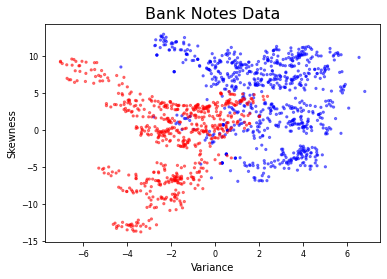

In [5]:
#3
#Scatter plot using Blue-Red color scheme, Blue=0 and Red=1
plt.scatter(df_bnotes['Variance'],df_bnotes['Skewness'],c = df_bnotes['Forged'],cmap='bwr', s=5, alpha=0.5)
plt.xlabel('Variance',size=10)
plt.ylabel('Skewness',size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Bank Notes Data',size=16)
plt.show()

In [6]:
#4
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)#splits data
X_train.shape, X_test.shape, y_train.shape, y_test.shape # to check shape

((1097, 2), (275, 2), (1097,), (275,))

In [7]:
#5
LR = LogisticRegression(random_state=0)#Create logistic regression object
LR.fit(X_train, y_train)#Fit model to data
# Test error
y_pred = LR.predict(X_test)
Err = (y_test!=y_pred).mean()
print('Test Error = ', Err)

Test Error =  0.11636363636363636


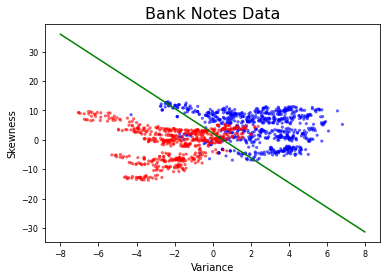

In [8]:
#6
# Logistic function
def p(beta0,beta1,beta2,x1,x2):
    u = np.exp(beta0 + beta1*x1 + beta2*x2)
    return u/(1+u)

#Logistic model - logit(p(x))=B_0+B_1*X1+B_2*X2
beta0 = LR.intercept_[0]
beta1 = LR.coef_[0,0]
beta2 = LR.coef_[0,1]

x1s = np.linspace(-8,8,100)
dec_bnd = -(beta0+beta1*x1s)/beta2# logit(p(x))=ln(0.5/0.5)=0
plt.plot(x1s, dec_bnd, c = 'g')
plt.scatter(df_bnotes['Variance'],df_bnotes['Skewness'],c = df_bnotes['Forged'],cmap='bwr', s=5, alpha=0.5)
plt.xlabel('Variance',size=10)
plt.ylabel('Skewness',size=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Bank Notes Data',size=16)
plt.show()

### 1.2 (15 marks)
  1. (8 marks) Using a for loop with $k=1,2,3,\ldots,10$, fit a $k$ nearest neighbours classifier to your training data, and calculate the test error. In the same loop, for each $k$, calculate the 200-fold cross-validation error  using the full dataset. Print out both errors at each loop, and store them in two separate lists called __test_errs__ and __cv_errs__.
  2. (4 marks) On a single graph, plot your two error lists against the $k$ values used to generate them. What is the optimal choice of $k$?
  3. (3 marks) Explain what competing factors determine the optimal choice of $k$, and comment on any differences you see between the test error plot and the cross validation error plot. 

In [9]:
#1
test_errs = []#empty lists
cv_errs = []
for k in range(1,11):#loop for k=1,...,10
    kNN = KNeighborsClassifier(n_neighbors = k)#KNN classifier object with for each k
    kNN.fit(X_train, y_train)#Fit model to data
    test_errs.append(np.mean(kNN.predict(X_test)!=y_test))#appends list, average of y_test_prediction not equal to y_test(error)
    cv_results = cross_validate(kNN, X, y, cv = 200)#Cross validation, 200 folds
    cv_errs.append(1 - cv_results['test_score'].mean())#appends list, cross validation error
    print ('k =',k,'test_err =',test_errs[k-1],'cv_err =',cv_errs[k-1])

k = 1 test_err = 0.06181818181818182 cv_err = 0.06142857142857139
k = 2 test_err = 0.06181818181818182 cv_err = 0.06321428571428556
k = 3 test_err = 0.05454545454545454 cv_err = 0.05095238095238086
k = 4 test_err = 0.05454545454545454 cv_err = 0.05380952380952364
k = 5 test_err = 0.05818181818181818 cv_err = 0.05452380952380953
k = 6 test_err = 0.05818181818181818 cv_err = 0.06047619047619035
k = 7 test_err = 0.05818181818181818 cv_err = 0.05952380952380931
k = 8 test_err = 0.06181818181818182 cv_err = 0.062380952380952426
k = 9 test_err = 0.05818181818181818 cv_err = 0.0697619047619048
k = 10 test_err = 0.06545454545454546 cv_err = 0.06761904761904758


<function matplotlib.pyplot.show(*args, **kw)>

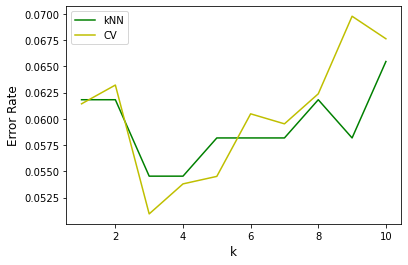

In [10]:
#2
k_vals = np.arange(1,11)
plt.plot(k_vals, test_errs, c = 'g')
plt.plot(k_vals, cv_errs, c = 'y')
plt.xlabel('k',size=12)
plt.ylabel('Error Rate',size=12)
plt.legend(['kNN','CV'])
plt.show

In [11]:
#3
# The optimal choice of k is 3. It is determined by simplicity(low variance) and flexibility(low bias)of our model.
# We need to balance them to prevent overfitting or underfitting the training data to minimse the test error. 
# The both graphs have classical u-shape but for optimal k CV graph has lower error. Also, kNN has same 
# error accross few different values of k, this is due fact we test it once for each k on test data. In CV we test it 
# on 200 folds and take a mean error for each k. 

## The following problem requires the avocado_data.csv dataset.

# Problem 2 (Avocado prices)

### 2.1. (10 marks)
  1. (1 mark) Load the __"avocado_data.csv"__ file in to a pandas DataFrame. The __response/target__ variable is contained in the `Price' column, and all other columns are __predictors/features__.
  2. (1 mark) Split your data frame into  $X$  and  $y$, and make sure that you include only the columns with numerical values.
  3. (1 mark) Split  $X$  and  $y$  into __X_train, X_test, y_train, y_test__.
  4. (2 mark) **Plot** some predictors versus the price in a way you find the most convinient.
  5. (3 mark) Fit a standard __multilinear regression model__ which uses all the predictors/features.
  6. (2 mark) Use your training and test data set to make predictions, find the corresponding $R^2$  and  $MSE$  scores by comparing your predictions with y_train and y_test, respectively. 

In [12]:
#1
df_avoc = pd.read_csv('avocado_data.csv')
df_avoc.head()

,Date,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,type numeric,year,region,region numeric,Price
0,27/12/2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,2015,Albany,0,1.33
1,20/12/2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,2015,Albany,0,1.35
2,13/12/2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,2015,Albany,0,0.93
3,06/12/2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,2015,Albany,0,1.08
4,29/11/2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,2015,Albany,0,1.28


In [13]:
#2
X = df_avoc.iloc[:,:-1]# all except last column, pandas DataFrame
y = df_avoc['Price']# pandas Series
X = X.select_dtypes(['number'])#columns with numerical values
display(X.head(), y.head())

,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type numeric,year,region numeric
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: Price, dtype: float64

In [14]:
#3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13686, 11), (4563, 11), (13686,), (4563,))

<function matplotlib.pyplot.show(*args, **kw)>

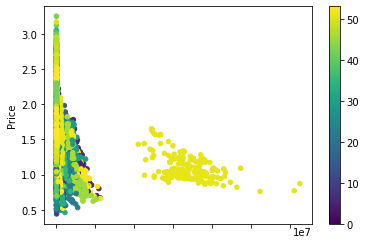

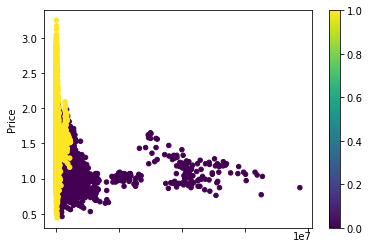

In [47]:
#4
df_avoc.plot.scatter(x = 'Total Volume', y = 'Price',c = df_avoc['region numeric'], cmap='viridis')
df_avoc.plot.scatter(x = 'Total Bags', y = 'Price',c = df_avoc['type numeric'], cmap='viridis')
plt.show

In [16]:
#5
lm = LinearRegression()#Creating the model
reg = lm.fit(X_train,y_train)# fitting multilinear regression model

In [17]:
#6
y_train_pred = reg.predict(X_train)#predicted y`s using model on x_train data
y_test_pred = reg.predict(X_test)##predicted y`s using model on x_test data
r2_train = r2_score(y_train, y_train_pred)#R squared on training data
r2_test = r2_score(y_test, y_test_pred)#R squared on test data
mse_train = mean_squared_error(y_train, y_train_pred)# Mean squared error on training data
mse_test = mean_squared_error(y_test, y_test_pred)#Mean squared error on test data

print(f"R squared on train data set is {r2_train}, R squared on test data set is {r2_test}")
print(f"MSE on train data set is {mse_train}, MSE on train data set is {mse_test}")

R squared on train data set is 0.4066804940473987, R squared on test data set is 0.4055697163113966
MSE on train data set is 0.09643951910200266, MSE on train data set is 0.09555534768756858


### 2.2. (25 marks)
  1. (7 marks)  Fit a __Lasso model__ with __Cross Validation__ (CV), to find an optimal __alpha__ (regularisation parameter) (it may be a very small value). Preprocessing (meaning scaling to have 0 mean and unit variance) your data before the Lasso will be beneficial, you will need to generate X_train, X_test from the scaled X.

  2.  (8 marks) Use __Recursive Feature Elimination (RFE)__ with CV that uses Lasso (with optimal alpha from 4.) as ranking estimator.
  3.  (3 marks) Generate a plot __Number of features selected__ versus __Cross validation score R^2__.
  4.  (7 marks)  Use the ranking of features from RFE to select only the ones with ranking 1. Your X_train and X_test should be modified to include only selected best features (with ranking 1).

In [18]:
#1

In [19]:
#Standardising X
scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)
#Test to show that mean of each predictor is zero, and variance is one
X_stand_mean = np.mean(X_stand, axis=0)
X_stand_var = np.var(X_stand, axis=0)
print(f"Mean of each of the feature {X_stand_mean.round(3)}")#with rounding to 3 dp
print(f"Variance of each of the feature {X_stand_var}")
X_stand = pd.DataFrame(X_stand)# converts back to Dataframe
X_stand.head()

Mean of each of the feature [-0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.]
Variance of each of the feature [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


,0,1,2,3,4,5,6,7,8,9,10
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,-1.700252
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,-1.700252
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,-1.700252
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,-1.700252
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,-1.700252


In [20]:
# splitting standardised X, and y to have same index on both
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13686, 11), (4563, 11), (13686,), (4563,))

In [21]:
# finding alpha
my_alphas = np.arange(0.00001, 0.0001, 0.00001)
modelCV = LassoCV(alphas=my_alphas, cv=5).fit(X_train, y_train)# Lasso model wit Cross Validation, 5 folds
alpha = modelCV.alpha_
alpha

4e-05

In [22]:
#2
estimator = Lasso(alpha=alpha)#using alpha from #1, Lasso as estimator
min_features_to_select=1
rfecv = RFECV(estimator=estimator, step=1, cv=KFold(5), scoring='r2', min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train)# fitting Recursive Feature Elimination with CV
print(f"Optimal number of features : {rfecv.n_features_}")
rfecv.ranking_

Optimal number of features : 8


array([4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2])

In [23]:
# ones represent "good features"

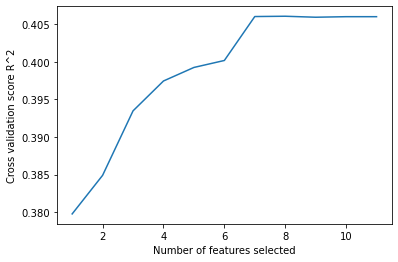

In [24]:
#3
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score R^2")
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
plt.show()

In [25]:
#4

In [26]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
3291,-0.169084,-0.227390,-0.143757,-0.197954,-0.103341,-0.205146,0.222093,-0.171058,-0.999836,-0.157353,-1.122713
313,1.113406,1.093789,1.036574,2.269193,0.983077,1.178717,0.337798,0.430020,-0.999836,-1.221282,-1.315226
15130,-0.243479,-0.231583,-0.241319,-0.210906,-0.237945,-0.237515,-0.222721,-0.175580,1.000164,0.906575,-1.251055
7238,-0.132434,-0.223623,0.016213,-0.192170,-0.175774,-0.198366,-0.091498,-0.170493,-0.999836,0.906575,0.224878
1595,-0.156008,-0.230085,-0.034542,-0.211799,-0.185926,-0.168779,-0.222664,-0.175580,-0.999836,-1.221282,0.224878


In [27]:
# using ranking from #2
X_train = X_train.iloc[:,1:-1]# removes first and last column
X_train.drop(X_train.columns[3],axis=1,inplace=True)# removes 4th column from remaining
X_train.head()# 1st, 5th, and 11th removed (0,4,10)

,1,2,3,5,6,7,8,9
3291,-0.227390,-0.143757,-0.197954,-0.205146,0.222093,-0.171058,-0.999836,-0.157353
313,1.093789,1.036574,2.269193,1.178717,0.337798,0.430020,-0.999836,-1.221282
15130,-0.231583,-0.241319,-0.210906,-0.237515,-0.222721,-0.175580,1.000164,0.906575
7238,-0.223623,0.016213,-0.192170,-0.198366,-0.091498,-0.170493,-0.999836,0.906575
1595,-0.230085,-0.034542,-0.211799,-0.168779,-0.222664,-0.175580,-0.999836,-1.221282


### 2.3. (optional, choose either 2.3 or 2.4) (35 marks)
  1. (6 marks) Convert X_train to pandas dataframe, y_train to pandas Series and reset their indices. Use __Isolation forest__ to eliminate 1% of outliers from your new X_train set (it is new after dropping irrelevant features in 5.). 
  2.  (4 marks) Fit a __decision tree__ with max depth set to $10$.
  3.  (3 marks) Create a path of alpha-s to prepare your tree for __pruning__.
  4.   (8 marks) For the obtained  alpha-s train each individual tree with max depth set to $10$. This may take some time about 2 minutes.
  5.   (8 marks)  Produce the plot of Nodes/depth versus alpha and most importantly __the plot__ Accuracy vs alpha (generating this plot may take about 5-10 minutes). Pick the best alpha.
  6.   (2 marks) Fit a decision tree with best alpha.
  7.   (2 marks) Make prediction on train data set and test data,  and print the relevant  $MSE$ ,  $R^2$  scores.
  8.   (2 marks) Make a comment on over-fitting, did your tree overfit? Compare the obtained scores in part 7. with the scores obtained from the Multilinear regression in 2.1 part 6. 

In [28]:
#1

In [29]:
type(X_train)# Converted in 2.2 1#

pandas.core.frame.DataFrame

In [30]:
type(y_train)# pandas Series from begining, see 2.1 2#, and  2.2 1# for splitting to y_train

pandas.core.series.Series

In [31]:
# Reseting index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
display(X_train.head(), y_train.head())

,1,2,3,5,6,7,8,9
0,-0.227390,-0.143757,-0.197954,-0.205146,0.222093,-0.171058,-0.999836,-0.157353
1,1.093789,1.036574,2.269193,1.178717,0.337798,0.430020,-0.999836,-1.221282
2,-0.231583,-0.241319,-0.210906,-0.237515,-0.222721,-0.175580,1.000164,0.906575
3,-0.223623,0.016213,-0.192170,-0.198366,-0.091498,-0.170493,-0.999836,0.906575
4,-0.230085,-0.034542,-0.211799,-0.168779,-0.222664,-0.175580,-0.999836,-1.221282


0    1.04
1    0.94
2    2.83
3    1.54
4    1.24
Name: Price, dtype: float64

In [32]:
# using Isolation forest tp identify outliers
clf = IsolationForest(contamination=0.01).fit(X_train)# contamination = percantage of outliers to identify/100
whole_list_with_outliers = clf.predict(X_train)
outliers_ind = np.where(whole_list_with_outliers==-1)[0]# list of outliers indices
print(f"Number of outliers is {outliers_ind.size} out of {X_train.shape[0]} in X_train")
print(f"which is {np.round(outliers_ind.size/X_train.shape[0] * 100)} % of the X_train") 

Number of outliers is 137 out of 13686 in X_train
which is 1.0 % of the X_train


In [33]:
X_train.shape, y_train.shape

((13686, 8), (13686,))

In [34]:
#Eliminating outliers
X_train = X_train.drop(outliers_ind)
y_train = y_train.drop(outliers_ind)
X_train.shape, y_train.shape

((13549, 8), (13549,))

In [35]:
#2
reg = DecisionTreeRegressor(criterion="mse", random_state=0, max_depth=10)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [36]:
#3
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [37]:
#4
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(criterion="mse", random_state=0, ccp_alpha=ccp_alpha, max_depth=10)
    reg.fit(X_train, y_train)
    regs.append(reg)

node_count = regs[-1].tree_.node_count
ccp = ccp_alphas[-1]
print(f"Number of nodes in the last tree is: {node_count} with ccp_alpha: {ccp}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06129317407611043


In [38]:
#5

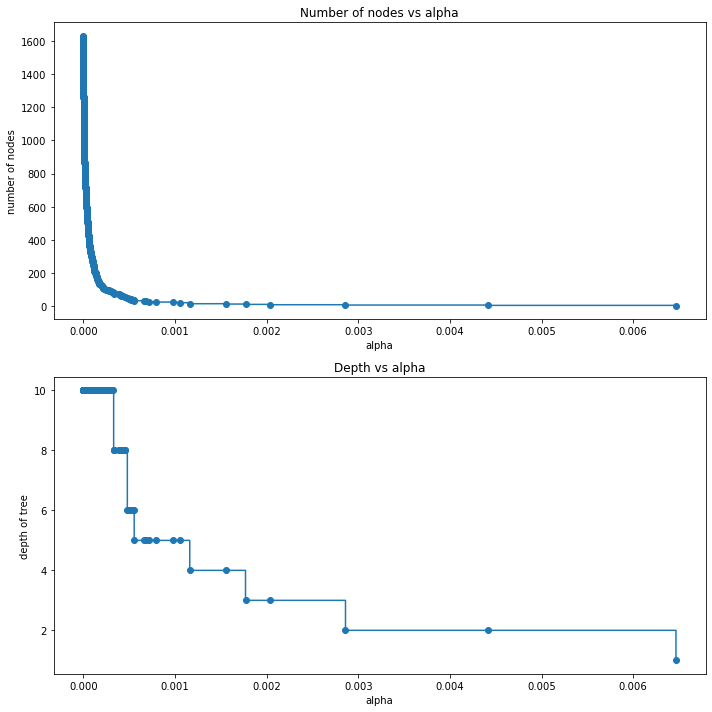

In [39]:
#Nodes/depth versus alpha
regs = regs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [reg.tree_.node_count for reg in regs]
depth = [reg.tree_.max_depth for reg in regs]
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

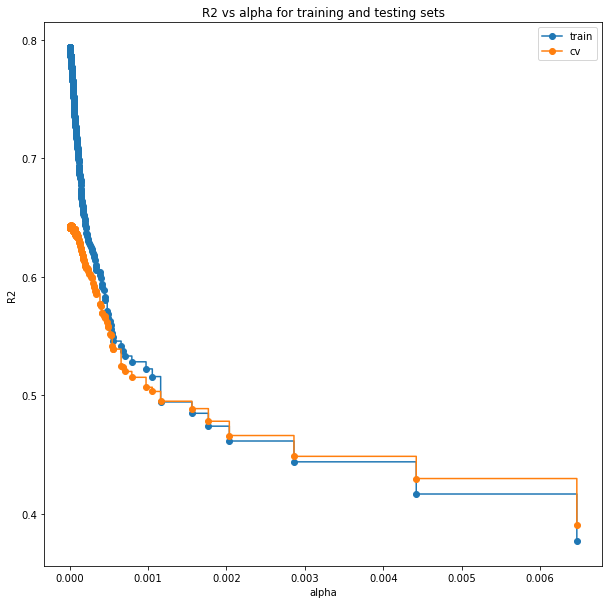

In [40]:
#Accuracy vs alpha
train_scores = [reg.score(X_train, y_train) for reg in regs]
cv_scores = [cross_val_score(reg,X_train, y_train, cv=5, scoring="r2").mean() for reg in regs]

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("R2")
ax.set_title("R2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, cv_scores, marker='o', label="cv",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [41]:
#best alpha
best_alpha = ccp_alphas[np.argmax(cv_scores)]
print(best_alpha)

1.6585645659715903e-05


In [42]:
#6
reg = DecisionTreeRegressor(criterion="mse", random_state=0, ccp_alpha=best_alpha).fit(X_train, y_train)#fitting w best alpha

In [43]:
#7

In [44]:
# dropping irrelevant features in test set to match the model and reseting index 
X_test = X_test.iloc[:,1:-1]
X_test.drop(X_test.columns[3],axis=1,inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
display(X_test.head(), y_test.head())

,1,2,3,5,6,7,8,9
0,-0.230562,-0.243685,-0.212540,-0.244003,-0.217915,-0.175580,1.000164,-1.221282
1,-0.227770,-0.145917,-0.086951,-0.203125,-0.136500,-0.107524,-0.999836,-1.221282
2,-0.148574,0.047790,-0.124827,0.094734,1.110996,-0.175580,1.000164,-0.157353
3,-0.231388,-0.241614,-0.212540,-0.241273,-0.209731,-0.175580,1.000164,0.906575
4,-0.230428,-0.242651,-0.205774,-0.229543,-0.222529,-0.175580,1.000164,1.970504


0    1.48
1    1.05
2    1.27
3    2.15
4    1.93
Name: Price, dtype: float64

In [45]:
#predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train =  mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"R squared on train data set is {r2_train}, R squared on test data set is {r2_test}")
print(f"MSE on train data set is {mse_train}, MSE on test data set is {mse_test}")

R squared on train data set is 0.8937199162637636, R squared on test data set is 0.6442868127643475
MSE on train data set is 0.017292019597859726, MSE on test data set is 0.0571813015185512


In [46]:
#8
#Scores obtained from the Multilinear regression in 2.1 part 6: 
#R squared on train data set is 0.4066804940473987, R squared on test data set is 0.4055697163113966
#MSE on train data set is 0.09643951910200266, MSE on train data set is 0.09555534768756858

#From Multilinear regression we obtained results of R squared = 0.4 (approx) 
#which indicate too simple model but very similar in accuracy on training and test set.
#However, if we analyse the R2 scores from the decision tree, accuracy improved over twice on the train data
#but slightly over half on test data. That indicates our model is too flexible, our tree overfit.

 





  


### 2.4. (optional, choose either 2.3 or 2.4) (35 marks)
  1. (6 marks)(6 marks) Convert X_train to pandas dataframe, y_train to pandas Series and reset their indices. Use __Isolation forest__ to eliminate 1% of outliers from your new X_train set (it is new after dropping irrelevant features in 5.).
  2.  (4 marks) Fit a __random forest__ model.
  3.  (4 marks)  Find all relevant scores on test and training sets, also include Out of Bag (OOB) score.
  4.  (10 marks) Use __RandomizedSearchCV__ over a wide range of random forest parameters to find the optimal paramaters for random forest. (This may take some time about 20 minutes with n_iter=100 and cv=5). 
  5.   (4 marks) Fit random forest with optimal patamers.
  6.   (3 marks) Find all relevant scores on test and training sets, also include OOB. 
  7.   (2 marks) Compare the results between the scores in 3. and 6, and make a conclusion.  
  8.   (2 marks) Make a comment regarding over-fitting, did your forest overfit? Compare the obtained scores in part 7. with the scores obtained from the Multilinear regression in 2.1 part 6.



